In [1]:
def add(a, b):
    """
    Docstring for add
    
    :param a: Description
    :param b: Description
    """
    return a + b

In [ ]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")

llm = ChatGroq(model="llama-3.1-8b-instant", api_key=groq_api_key)

In [9]:
llm_bind_tools = llm.bind_tools([add])
llm_invoker = llm_bind_tools.invoke("what is 2 plus 2?")
print(llm_invoker)

llm_metadataa = llm_invoker.response_metadata
print(llm_metadataa)

llm_invoker.tool_calls

content='' additional_kwargs={'tool_calls': [{'id': 'ynsxqjw9j', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 238, 'total_tokens': 256, 'completion_time': 0.0244777, 'completion_tokens_details': None, 'prompt_time': 0.015510422, 'prompt_tokens_details': None, 'queue_time': 0.050907268, 'total_time': 0.039988122}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b5036-4c3c-7f63-8ed2-bf38a7513662-0' tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'ynsxqjw9j', 'type': 'tool_call'}] usage_metadata={'input_tokens': 238, 'output_tokens': 18, 'total_tokens': 256}
{'token_usage': {'completion_tokens': 18, 'prompt_tokens': 238, 'total_tokens': 256, 'completion_time': 0.0244777, 'completion_tokens_details': None, 'prompt_time': 

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'ynsxqjw9j',
  'type': 'tool_call'}]

In [10]:
from langgraph.graph import StateGraph
from typing_extensions import TypedDict
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


In [12]:
initial_messages = [AIMessage(content="Please tell me your name?")]
initial_messages.append(HumanMessage(content="Hi my name is Taran"))

initial_messages

[AIMessage(content='Please tell me your name?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi my name is Taran', additional_kwargs={}, response_metadata={})]

In [13]:
ai_message=[AIMessage("Which programming language do you like?")]

add_messages(initial_messages, ai_message)


[AIMessage(content='Please tell me your name?', additional_kwargs={}, response_metadata={}, id='b19729d3-d5a5-44f0-a8c7-0c508fd0e263'),
 HumanMessage(content='Hi my name is Taran', additional_kwargs={}, response_metadata={}, id='ba52a45a-98f0-4ef5-b749-c9c9e1ce9d99'),
 AIMessage(content='Which programming language do you like?', additional_kwargs={}, response_metadata={}, id='7b5c1a55-a2a5-446b-ac9b-a3a819cd50a7')]

In [30]:
def llm_tool_call(state: AgentState):
    calls = state['messages']
    result = llm.invoke(calls)
    return {"messages": result}
    

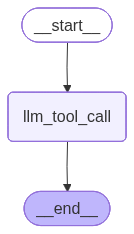

In [31]:
from langgraph.graph import START, END, StateGraph

graph = StateGraph(AgentState)

graph.add_node("llm_tool_call", llm_tool_call)
graph.add_edge(START, "llm_tool_call")
graph.add_edge("llm_tool_call", END)

graph_builder = graph.compile()

graph_builder


In [26]:
invoker = graph_builder.invoke(AgentState({"messages":"What's my name?"}))
invoker

{'messages': [HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}, id='2bc1399c-73ff-4b3a-80cb-2746db36fe6c'),
  AIMessage(content="I don't have any information about your name. Our conversation just started, and I'm a large language model, I don't retain any information about individual users. If you'd like to share your name, I'd be happy to chat with you.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 40, 'total_tokens': 92, 'completion_time': 0.0632651, 'completion_tokens_details': None, 'prompt_time': 0.00954382, 'prompt_tokens_details': None, 'queue_time': 0.066627129, 'total_time': 0.07280892}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b505b-4aaa-7963-bdb3-841efc9e3fdf-0', usage_metadata={'input_tokens': 40, 'output_tokens': 52, 'total_tokens': 92})

In [27]:
invoker = graph_builder.invoke(AgentState({"messages":"My name is Taran"}))
invoker

{'messages': [HumanMessage(content='My name is Taran', additional_kwargs={}, response_metadata={}, id='23ba0d4b-4d83-4930-b0a3-6c4c62dfcb01'),
  AIMessage(content='Nice to meet you, Taran. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 40, 'total_tokens': 64, 'completion_time': 0.034006607, 'completion_tokens_details': None, 'prompt_time': 0.002697413, 'prompt_tokens_details': None, 'queue_time': 0.051394937, 'total_time': 0.03670402}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b505b-51ba-7853-b64f-11924d76959c-0', usage_metadata={'input_tokens': 40, 'output_tokens': 24, 'total_tokens': 64})]}

In [32]:
invoker = graph_builder.invoke({"messages":"what is 2 plus 2"})
invoker

{'messages': [HumanMessage(content='what is 2 plus 2', additional_kwargs={}, response_metadata={}, id='5ae0a504-5bdb-459e-91fe-93756bbe0ea8'),
  AIMessage(content='2 + 2 = 4', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 42, 'total_tokens': 50, 'completion_time': 0.006694764, 'completion_tokens_details': None, 'prompt_time': 0.002372314, 'prompt_tokens_details': None, 'queue_time': 0.051678586, 'total_time': 0.009067078}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b505c-0335-7260-9f61-c1e20738bca5-0', usage_metadata={'input_tokens': 42, 'output_tokens': 8, 'total_tokens': 50})]}